## Task 1:Exploring Supervised Machine Learning

Task: In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of study hours.Also we are supposed to find the percentage scored if a student studies for around 9.25hrs.

This is a simple linear regression task as it involves just two variables. 

Data can be found at http://bit.ly/w-data 

In [3]:
# Importing all necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### Loading Dataset

In [5]:
url = "http://bit.ly/w-data" #Loading dataset
ds = pd.read_csv(url)
print("Data imported successfully")
ds.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Plotting the data points on 2-D graph and finding relationship between the data

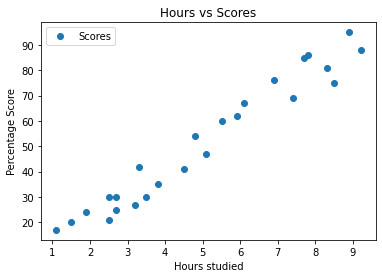

In [6]:
ds.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

#### From the graph we can clearly see that there exists a positive linear relationship between the number of hours and the marks scored

### Preparing the data

In this step we are dividing the data into "attributes"(inputs) and "labels"(outputs)

In [9]:
x = ds.iloc[:, :-1].values  
y = ds.iloc[:, 1].values 
print("attributes and labels ready")

attributes and labels ready


### Splitting the data into training and testing sets

In [10]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

### Training the model

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete")

Training complete


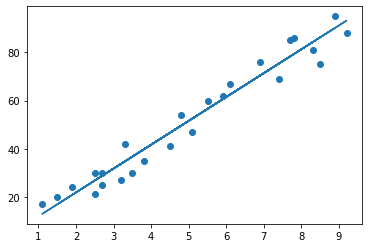

In [12]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### Making Predictions


In [13]:
print(x_test) # Testing Data (Hours studied)
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
# Comparison between actual vs predicted
ne= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
ne

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Testing with a new data

In [28]:
hours = 9.25
test=np.array([hours])
test=test.reshape(-1,1)
new_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(new_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


#### The student who studies for about 9.25 hours will score a percentage of 93.69173248737538

### Evaluation Metrics

In [31]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 4.18385989900298
Mean Squared Error: 21.598769307217413
Root Mean Squared Error: 4.647447612100368
